In [1]:
import pandas as pd

import statsmodels.api as sm
import pandas as pd
import datetime
from pathlib import Path

pd.set_option("display.max_columns", None)
# !pip install statsmodels


# %config InlineBackend.figure_format = "svg"
# %config InlineBackend.print_figure_kwargs = {"dpi" : 300}
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# from cadFace.vis import percentiles_plot
import sci_palettes

try:
    sci_palettes.register_cmap()
except:
    pass
import scienceplots
from pathlib import Path
import pandas as pd
from ppp_aging.ppp_model import *
from ppp_aging.model import generate_states_cols

plt.style.use(["nature", "no-latex"])
sns.set_context("paper", font_scale=1.5)
sns.set_palette("nejm")

In [2]:
train_all = pd.read_pickle("result/part1/train_imputed.pkl")
test_all = pd.read_pickle("result/part1/test_imputed.pkl")

train_score = pd.read_csv("5_dl_fit/3/train_score.csv")
test_score = pd.read_csv("5_dl_fit/3/test_score.csv")
train_score["eid"].astype(int)
test_score["eid"].astype(int)

train_all = train_all.merge(train_score, on="eid")
test_all = test_all.merge(test_score, on="eid")

In [8]:
train_all[["eid", "incident_cad", "pred"]].to_csv(
    "result/scores/linearFormer_train.csv", index=False
)
test_all[["eid", "incident_cad", "pred"]].to_csv(
    "result/scores/linearFormer_test.csv", index=False
)

In [3]:
test_all

eid       PRS  sex  height  weight       BSA  genotype_array  \
0      2883530.0  1.030583  1.0   171.0    64.2  1.746282               2   
1      2867444.0  2.192278  0.0   165.0    55.8  1.599219               2   
2      5869793.0  0.653794  1.0   171.0    77.3  1.916181               2   
3      4880838.0  0.664819  0.0   163.0    84.4  1.954852               2   
4      3987428.0  0.826465  0.0   164.0    73.1  1.824859               1   
...          ...       ...  ...     ...     ...       ...             ...   
15427  5241912.0  1.085083  1.0   176.0   116.0  2.381409               2   
15428  3851862.0  1.294348  0.0   169.0    72.9  1.849932               2   
15429  1144512.0  0.722791  1.0   191.0    96.6  2.263883               1   
15430  1177099.0  1.335307  1.0   175.0    75.1  1.910679               2   
15431  3881441.0  1.055519  0.0   161.0    58.3  1.614715               2   

        age      PC1        PC2        PC3       PC4        PC5       PC6  \
0      44.0  71.3002 -100.66700  81.855800  9.994410  -0.516576  4.576150   
1      53.0 -12.4815    3.16181  -3.999700  0.309314  -6.865420 -1.982800   
2      62.0 -11.4721    2.20519   0.205421 -1.035540  -2.391010 -2.383070   
3      62.0 -11.1640    3.66252  -5.106300  2.058800   0.185104 -1.089780   
4      66.0 -11.4666    2.77498  -0.076815  1.956800  -3.117790  1.036540   
...     ...      ...        ...        ...       ...        ...       ...   
15427  45.0 -10.8083    4.46241  -3.407760  0.549259  -3.142720 -1.816660   
15428  40.0 -12.6549    3.40064  -3.637290 -1.102990  -6.000440 -0.391299   
15429  59.0 -12.7237    1.46547  -0.964256  0.600405   4.758100 -1.273080   
15430  63.0 -15.1573    7.36690  -4.163850 -0.749832  -9.753590 -1.309890   
15431  53.0 -12.4170    4.44358   1.595030  4.310980  14.360700  0.618842   

            PC7       PC8        PC9       PC10  assessment_center  \
0      1.832860  5.045020   1.614310  18.488800                  4   
1     -1.245250  1.828070  -4.040440  -0.823290                 11   
2      0.886641 -0.934631   1.414580   1.704540                  9   
3      0.567691 -2.982090 -11.959100  -1.167040                 12   
4     -0.677142 -1.716000  -5.479400   1.998590                  8   
...         ...       ...        ...        ...                ...   
15427 -0.497610 -0.022318  -5.462610   2.646430                 15   
15428 -0.086262  1.749640  -0.649827   1.585260                  2   
15429  2.218810  0.648162  -5.390120   0.535409                 12   
15430 -2.070880 -5.465710   6.209610   3.183450                 20   
15431 -1.265730  0.353728   0.951739   1.532330                  9   

       age_squared      BMI  dbp_a       sbp_a      tc_a      tg_a     hdl_a  \
0           1936.0  21.9555   76.0  115.000000  5.851000  0.893000  1.635000   
1           2809.0  20.4959  100.0  150.000000  7.407000  3.176000  1.415000   
2           3844.0  26.4355   81.0  144.000000  5.909000  1.869000  1.670000   
3           3844.0  31.7663   87.0  128.000000  5.603000  1.184000  1.451221   
4           4356.0  27.1788   82.0  124.000000  5.887954  1.797038  1.451221   
...            ...      ...    ...         ...       ...       ...       ...   
15427       2025.0  37.4483   75.0  111.000000  5.547000  1.687000  1.416000   
15428       1600.0  25.5243   75.0  112.000000  5.513000  1.327000  1.871000   
15429       3481.0  26.4795   99.0  156.000000  5.902000  1.170000  1.662000   
15430       3969.0  24.5224    NaN  141.285655  6.063000  2.449000  1.399000   
15431       2809.0  22.6715   75.0  129.000000  7.060000  1.208000  2.463000   

          ldl_a    dbp    sbp     tc     tg    hdl    ldl   apob  cad  mi  \
0      3.549000   76.0  115.0  5.851  0.893  1.635  3.549  1.002    0   0   
1      4.840000  100.0  150.0  7.407  3.176  1.415  4.840  1.433    0   0   
2      3.587000   81.0  144.0  5.909  1.869  1.670  3.587  1.025    0   0   
3      3.394000   87.0  128.0  5.603  1.184    NaN  3

<Axes: xlabel='pred', ylabel='Density'>

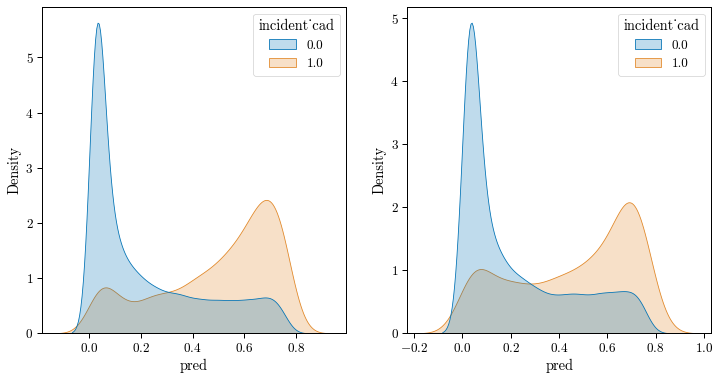

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.kdeplot(
    data=train_all, x="pred", hue="incident_cad", ax=ax[0], common_norm=False, fill=True
)
sns.kdeplot(
    data=test_all, x="pred", hue="incident_cad", ax=ax[1], common_norm=False, fill=True
)

In [5]:
from ppp_prediction.corr import cal_binary_metrics

cal_binary_metrics(test_all["incident_cad"], test_all["pred"])

{'AUC': 0.764446157941223,
 'ACC': 0.6859123898392949,
 'Macro_F1': 0.5019415740540198,
 'Sensitivity': 0.7250900360144058,
 'Specificity': 0.6837454620179464,
 'APR': 0.15999708746417507}

In [6]:
RS = [
    "age",
    "sex",
    "ldl_a",
    "hdl_a",
    "tc_a",
    "tg_a",
    "sbp_a",
    "BMI",
    "smoking",
    "prevalent_diabetes",
]

need_protein = [
    "NTproBNP",
    "MMP12",
    "REN",
    "LTBP2",
    "LGALS4",
    "LPA",
    "NRCAM",
    "CD99",
    "BCAM",
    "VWC2",
    "GCHFR",
    "SPINT2",
    "SDC4",
    "SCN4B",
    "SERPINA3",
    "APLP1",
    "DPY30",
    "NOTCH3",
    "DTX3",
    "CDH3",
]

In [7]:
from ppp_prediction.model import fit_best_model

res = []

for name, X_var in [
    ["pred", ["pred"]],
    [["protein"], need_protein],
    ["RS", RS],
    ["RS + protein", RS + need_protein],
    ["RS + pred", RS + ["pred"]],
    ["PRS + RS + protein", RS + need_protein + ["PRS"]],
    ["PRS + RS + pred", RS + ["pred"] + ["PRS"]],
    ["RS + protein + pred + PRS", RS + need_protein + ["pred"] + ["PRS"]],
]:

    (
        model,
        train_metrics,
        test_metrics,
        train_imputed_data,
        test_imputed_data,
        best_models,
    ) = fit_best_model(
        train_df=train_all,
        test_df=test_all,
        X_var=X_var,
        y_var="incident_cad",
        method_list="Lasso",
        cv=2,
    )

    test_metrics["name"] = name
    res.append(test_metrics)
    test_all[name] = model.predict(test_all[X_var])

res_df = pd.DataFrame(res)
res_df

[I] [15:48:47.225502] Unused keyword parameter: random_state during cuML estimator initialization
train shape: (32406, 1), val shape is (3601, 1), test shape is (15432, 1)
Fitting 2 folds for each of 10 candidates, totalling 20 fits


KeyboardInterrupt: 

In [26]:
model.predict(test_imputed_data[X_var])

/home/xutingfeng/miniforge3/envs/rapids-24.02/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


array([0.03377464, 0.05909683, 0.11901581, ..., 0.04818387, 0.13210208,
       0.03816195])

In [36]:
test_all[["RS", "pred", "PRS"]].corr()

,RS,pred,PRS
RS,1.000000,0.662277,0.047002
pred,0.662277,1.000000,0.049131
PRS,0.047002,0.049131,1.000000


In [37]:
age_bin_list = ["0-60", "60-65", "65-70"]

test_all["age_bin"] = pd.cut(
    test_all["age"],
    bins=[0, 60, 65, 70],
    labels=age_bin_list,
)
test_all.groupby(["age_bin"]).value_counts(["incident_cad"])

age_bin  incident_cad
0-60     0.0             9001
         1.0              297
60-65    0.0             3330
         1.0              279
65-70    0.0             2268
         1.0              257
dtype: int64

In [38]:
from ppp_prediction.corr import cal_binary_metrics_bootstrap


def cal_age_bin_metrics(df, age_bin_col, label, method_list, n_resmaples=100):
    age_bin = df[age_bin_col].unique()
    if isinstance(method_list, str):
        method_list = [method_list]
    age_bin_refit_model_res = []
    for method in method_list:
        for age_bin in age_bin_list:
            c_df = df.query(f"{age_bin_col} == '{age_bin}'")[[label, method]]
            na_nums = c_df.isna().any().sum()
            print(f"{age_bin}, {method} has NA: {na_nums} will drop")
            c_df = c_df.dropna()
            metrics = cal_binary_metrics_bootstrap(
                c_df[label], c_df[method], ci_kwargs={"n_resamples": n_resmaples}
            )
            metrics["age_bin"] = age_bin
            metrics["method"] = method
            metrics["n_case"] = c_df[label].sum()
            metrics["n_control"] = c_df.shape[0] - c_df[label].sum()
            age_bin_refit_model_res.append(metrics)
    age_bin_refit_model_res = pd.DataFrame(age_bin_refit_model_res)
    return age_bin_refit_model_res

In [39]:
res = cal_age_bin_metrics(
    test_all, "age_bin", "incident_cad", ["pred"], n_resmaples=100
)
res

0-60, pred has NA: 0 will drop


60-65, pred has NA: 0 will drop
65-70, pred has NA: 0 will drop


,AUC,AUC_UCI,AUC_LCI,ACC,ACC_UCI,ACC_LCI,Macro_F1,Macro_F1_UCI,Macro_F1_LCI,Sensitivity,Sensitivity_UCI,Sensitivity_LCI,Specificity,Specificity_UCI,Specificity_LCI,APR,APR_UCI,APR_LCI,age_bin,method,n_case,n_control
0,0.755322,0.782608,0.732411,0.690794,0.700086,0.682666,0.470289,0.477281,0.461078,0.713805,0.751525,0.654858,0.690034,0.701204,0.677573,0.109194,0.132497,0.074775,0-60,pred,297.0,9001.0
1,0.718729,0.743020,0.691419,0.627875,0.639817,0.614533,0.491699,0.504094,0.475263,0.713262,0.747475,0.661145,0.620721,0.635835,0.606306,0.167852,0.198202,0.129608,60-65,pred,279.0,3330.0
2,0.700749,0.733446,0.670925,0.714851,0.732089,0.696238,0.555773,0.577397,0.537026,0.571984,0.620137,0.511801,0.731041,0.749030,0.716022,0.204019,0.241633,0.164704,65-70,pred,257.0,2268.0
